In [1]:
##NOTE: This notebook will run properly ONLY on PYTHON 3 KERNEL

import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib.backends.backend_pdf import PdfPages
#from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib as mpl
import numpy as np #import for transposing


In [2]:
##Goals:
    #Figure out how data sets can be incorporated into model rules
        #i.e. analyze troop size over time
    #Play with the temporal data/changes
        #just explore the data
    #Confirm the rates from the rules with rates in data
    #Focus on quantifiable features
        #Don't worry about comments or identifiable individuals (for now)
    #Build a statistical model for multiple variables
        #Timeseries -> birth rate, death rate
    
    
##Questions:
    #What does that first column represent?
        #No title, no header, just occassional letters
        
    #Complete count column? 
        #Why is this number different than Troop Number?
        
    #What does Group Spread mean?    
        #distance
        #check back with Claire for units
        
    #Group Spread, Number juv, etc columns
        #1+? 3+? 
        #Does this represent at least?
        #What do I do with this data?
        #take at face value
        
    #BM numbers on Number juv/sub-adult column?
        #What are these? Do they belong somewhere else?
        #See notes
        
    #Curiosity: Cloud Cover? Measured in?
        #percentage
    
    #Is troop number an identifier or the number of individuals?
        #This will help determine placement of NA's and 0's 
        #Can't place them with confidence without this information
        
    #What does Pregnant Third mean? Third trimester or equivalent?
        #yes
    
    #Descriptions in Illness rank? Are they switched with description (next column)? Some have 1 or nothing in description column
        
    
    #What should I do with feces yes with no number? Does that mean yes-1 or yes - no count?
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    #How do I determine rates? Are they just averages?
        #x amount of mongoose die per y time interval?
        #Should y be the entirety of the data interval?
        
    #How to account for splits,dispersals,fissions?
    
    #Occasionally troop count was not complete
        #How to account this into death rate?
        #i.e. troop size did not actually decrease just wasn't counted
    

In [3]:
#Work on standardizing data
#Add 0's and NA's to blanks/NaN's
#No way to distinguish
    #Could put 0 everywhere but may skew data where numbers matter like temperature and lat/long
    
###DON'T CONTINUE WITHOUT NECESSARY COLUMNS STANDARDIZED (COLUMNS S,T,U,V,W)

In [4]:
##HELPFUL
    ##State columns required for model rules i.e. date, num juv/aub-ad, pregnant, pups, troop number

In [5]:
##Work on one rate at a time(?)
    #The average of an average is still the average, so may not have to work on these per troop

In [6]:
mon_data = pd.read_csv("../Mongoose Modeling/Standardized Date.csv")


In [7]:
#Handling date/time objects
def clean_date(x):
        return datetime.strptime(x,'%d-%b-%y')

mon_data['Date'] = mon_data.Date.apply(lambda x: clean_date(x))

In [8]:
##Read in standardized data and convert to dataframe

mong_data = pd.DataFrame(mon_data)


In [9]:
mong_data.head()

,Index,Observation ID,Date,Time,Observers,Location,Latitude,Longitude,Rain Type,Land Use,...,Number injured,Description of Injuries,Feces,Urine,Anal Gland Secr.,Comments,Mix,Troop Mix,Split Number,Split Description
0,NaN,NaN,2015-08-27,9:45,Stephanie and Nisha,Chobe Land Board on the river side,-17.8038971,25.1478043,NaN,NaN,...,0,NaN,0,0,0,two troops in contact; quite aggressive with a...,NaN,NaN,NaN,NaN
1,NaN,NaN,2015-08-27,11:10,Stephanie and Nisha,Bush at the town side of Mowana golf course,-17.7895879,25.157479,NaN,NaN,...,0,NaN,0,0,0,Running across the dirt road; difficult to obs...,NaN,NaN,NaN,NaN
2,NaN,NaN,2015-08-27,12:20,Stephanie and Nisha,Campsite #8 at Thebe River Safaris,-17.7858437,25.1826409,NaN,NaN,...,0,NaN,0,0,0,Foraging and resting in the shade,NaN,NaN,NaN,NaN
3,NaN,NaN,2015-08-27,15:30,Stephanie and Nisha,CCH swimming pool area,-17.8269535,25.1380491,NaN,NaN,...,1,5 - not using left hind leg,0,0,0,Radiocollared inidividual injured - not using ...,NaN,NaN,NaN,NaN
4,NaN,NaN,2015-08-28,9:05,Stephanie and Nisha,Safari tents at CSL,-17.8084964,25.1459804,NaN,NaN,...,NaN,NaN,0,0,0,Under Safari tent #2; difficult to observe; a ...,NaN,NaN,NaN,NaN


# Death Rate

In [10]:
# #9 Overall death rate

#Observe all the troop numbers (if that represents count) over time grouped by troop

#How do you account for splits, dispersals, fissions?
death = pd.DataFrame(mon_data, columns = ["Date","Troop","Troop Number","Complete Count?"])

death = death.dropna(subset = ["Troop Number","Date","Troop"])

death = death[death["Complete Count?"] != 'No']

death.shape

(400, 4)

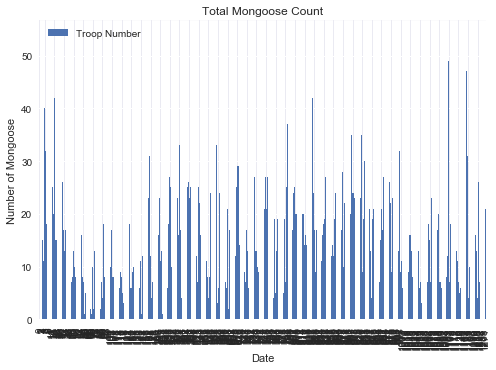

In [11]:
#Figure of All Troop Sizes for the Entire Dataset
death.plot(kind = 'bar')
plt.title('Total Mongoose Count')
plt.xlabel('Date')
plt.ylabel('Number of Mongoose')

#How to continue:
    #Should I track decreases by troop?
        #Concerns: Troop counts aren't always complete.(Discriminate further to complete count = yes)
            #Do with and without complete count and show graphs next to each other
            #How to handle complete count = NA?

In [12]:
grouped_troops = death.groupby('Troop').count()

#wd = pd.DataFrame(index = ["Date","Troop","Troop Number"])

#for i in grouped_troops['Troop']:
    #wd = grouped_troops.get_group(str(i))
grouped_troops.shape   

(38, 3)

C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736326.0, right=736326.0
  'left=%s, right=%s') % (left, right))
C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=736503.0, right=736503.0
  'left=%s, right=%s') % (left, right))
C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735961.0, right=735961.0
  'left=%s, right=%s') % (left, right))
C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\matplotlib\axes\_base.py:2903: UserWarni

Troop
BRG                     Axes(0.125,0.2;0.775x0.68)
CCH                     Axes(0.125,0.2;0.775x0.68)
CFT                     Axes(0.125,0.2;0.775x0.68)
CGL                     Axes(0.125,0.2;0.775x0.68)
CSL                     Axes(0.125,0.2;0.775x0.68)
DUMP                    Axes(0.125,0.2;0.775x0.68)
FARMS                   Axes(0.125,0.2;0.775x0.68)
FOR                     Axes(0.125,0.2;0.775x0.68)
FOR                     Axes(0.125,0.2;0.775x0.68)
Gate Troop              Axes(0.125,0.2;0.775x0.68)
Individual "Nubbins"    Axes(0.125,0.2;0.775x0.68)
KAZI                    Axes(0.125,0.2;0.775x0.68)
KUBU                    Axes(0.125,0.2;0.775x0.68)
KUBU/KWA                Axes(0.125,0.2;0.775x0.68)
KWA                     Axes(0.125,0.2;0.775x0.68)
LIB                     Axes(0.125,0.2;0.775x0.68)
MOGO                    Axes(0.125,0.2;0.775x0.68)
MOW                     Axes(0.125,0.2;0.775x0.68)
Nubbins                 Axes(0.125,0.2;0.775x0.68)
ODH                     A

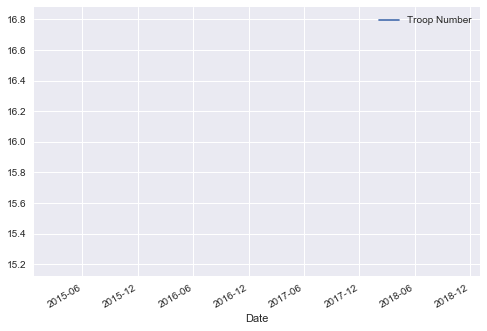

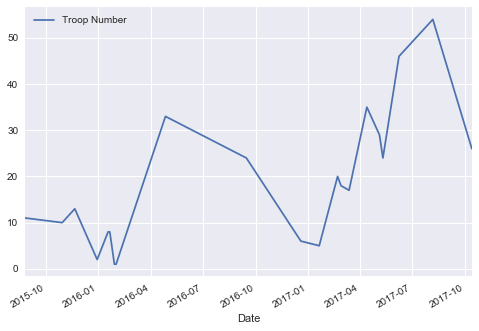

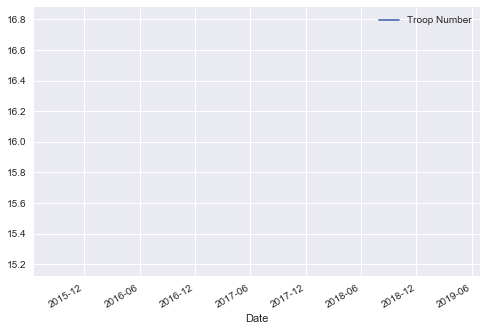

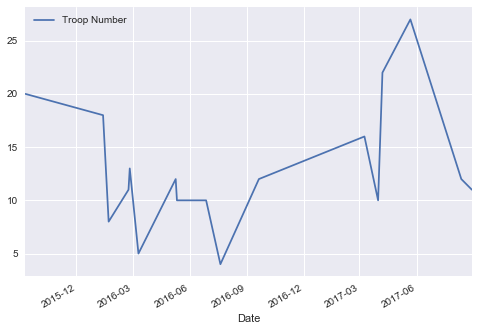

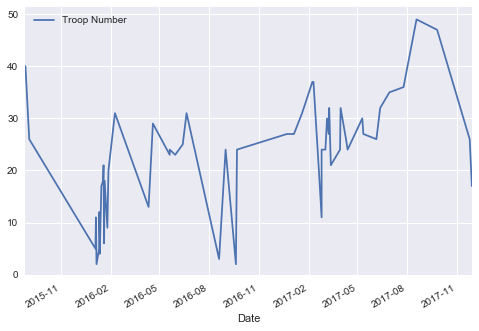

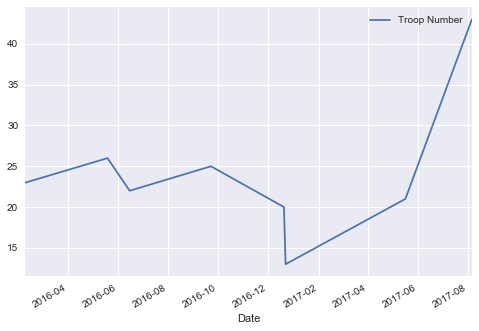

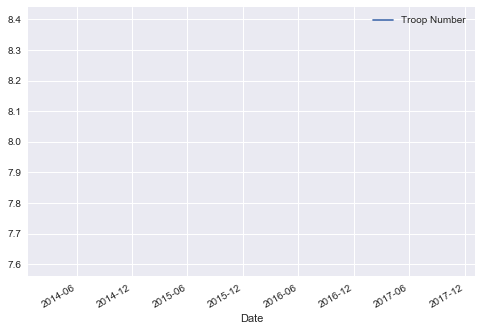

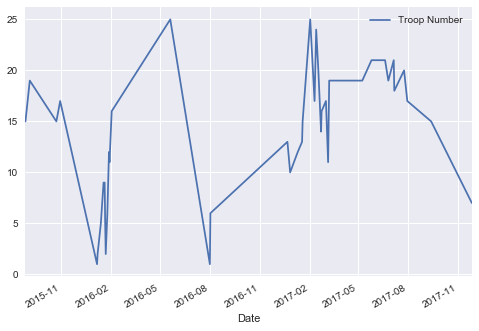

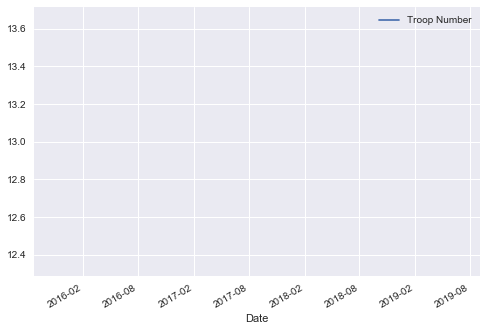

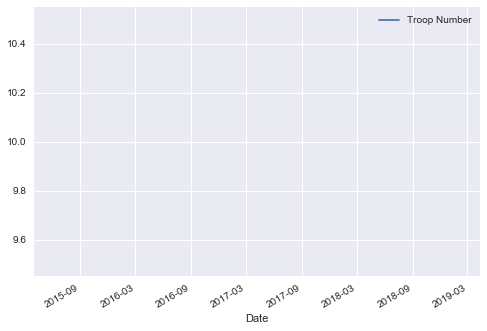

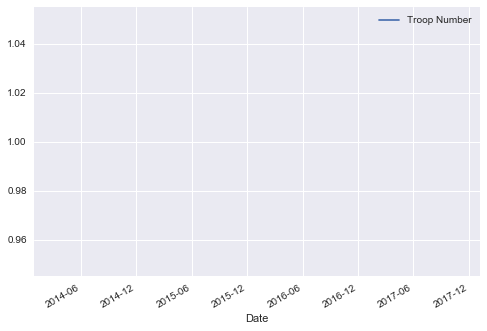

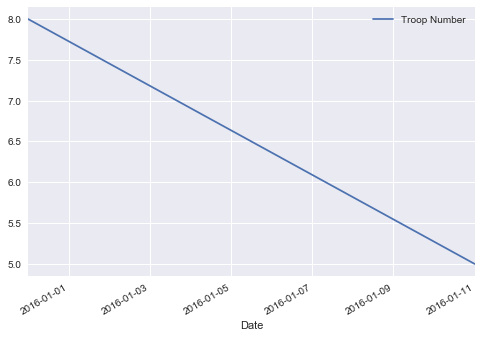

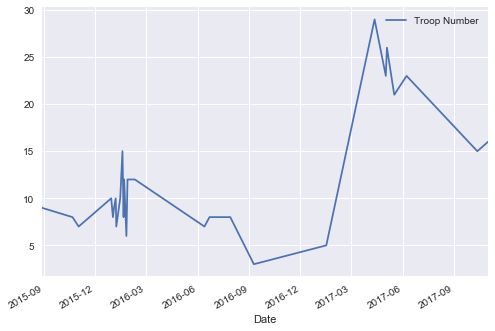

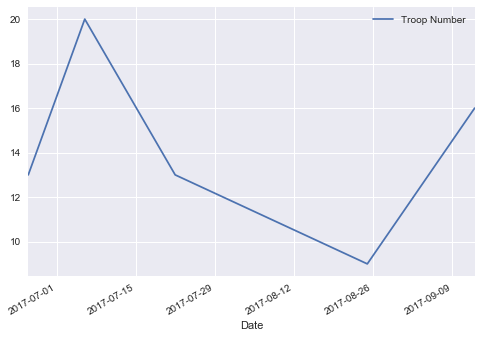

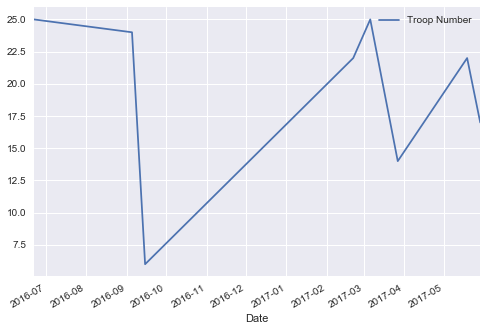

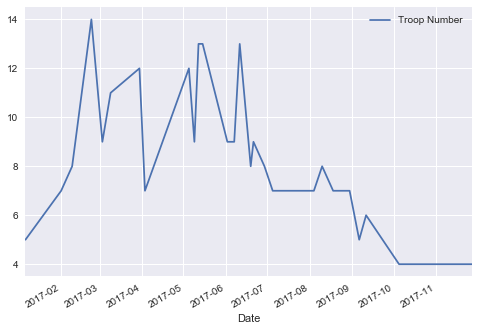

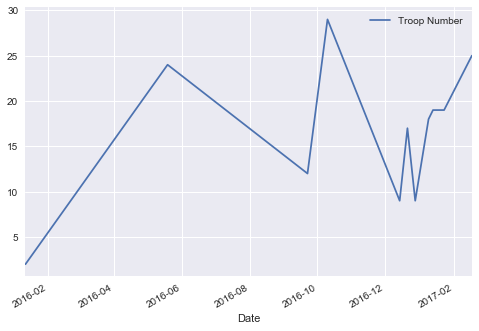

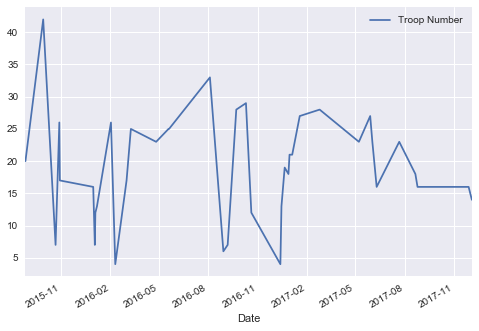

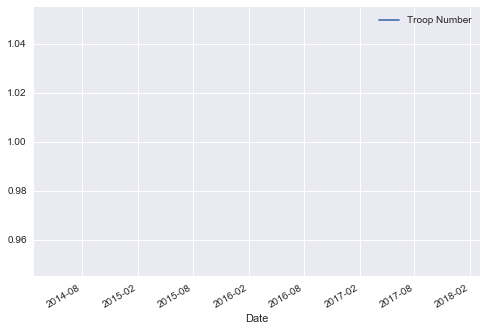

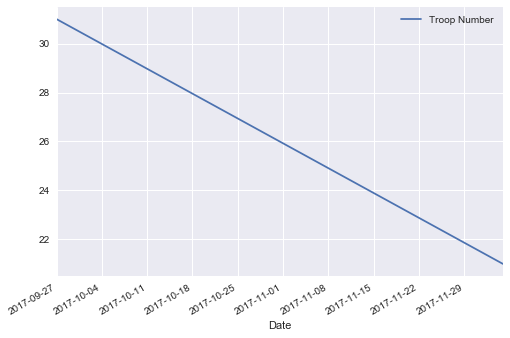

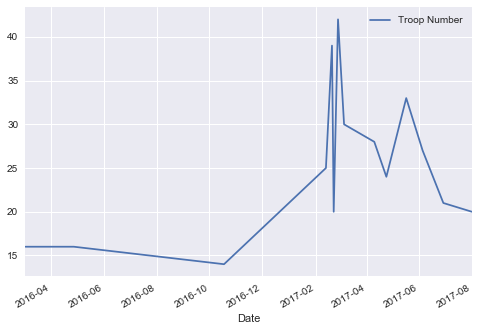

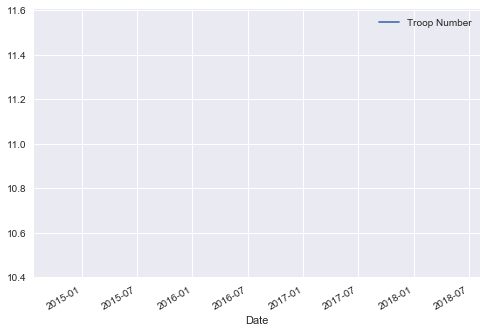

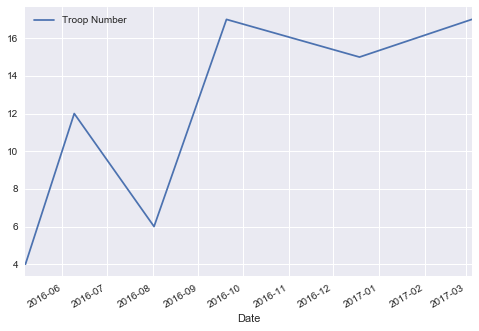

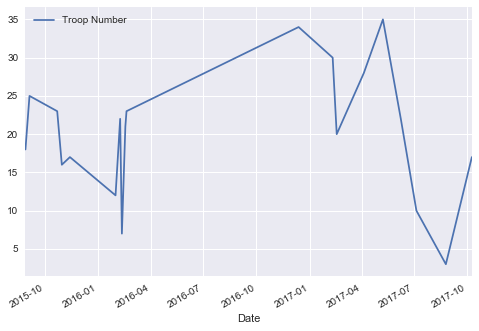

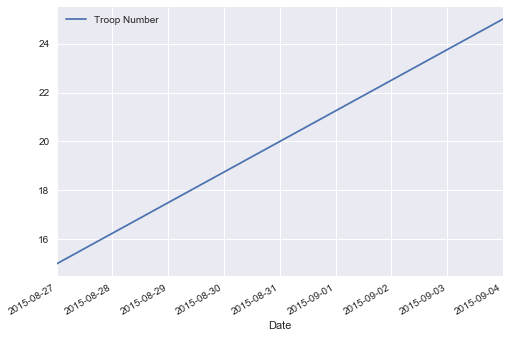

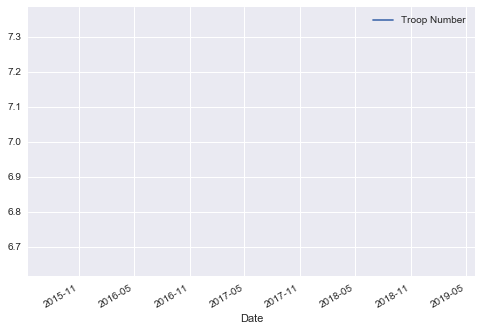

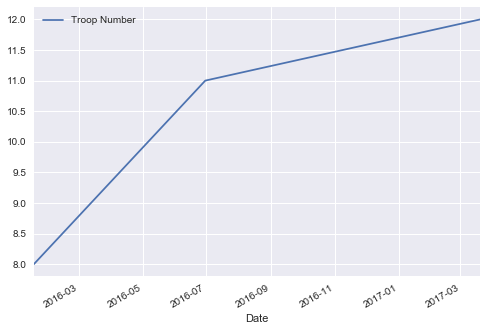

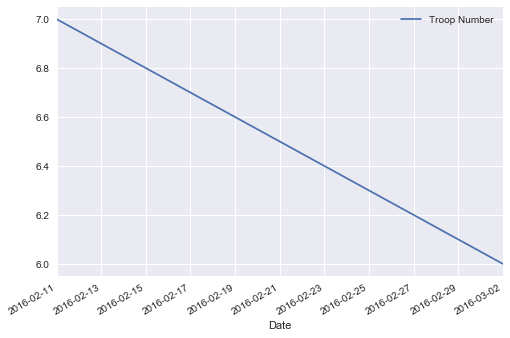

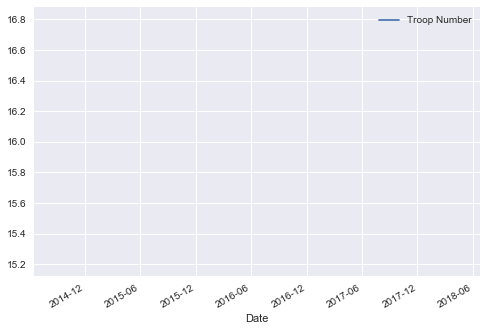

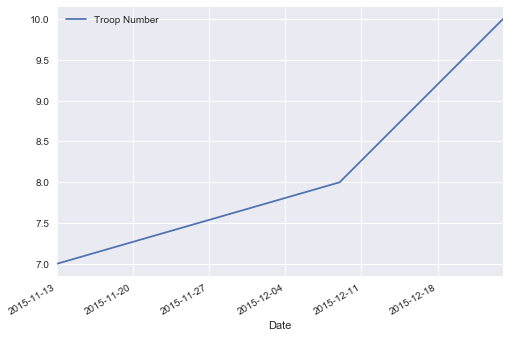

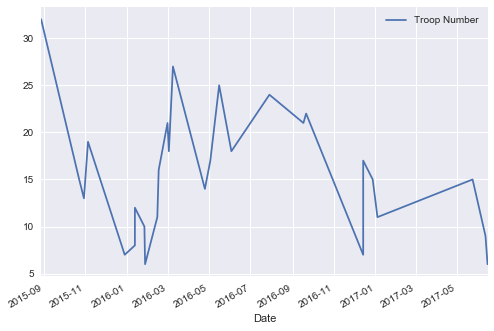

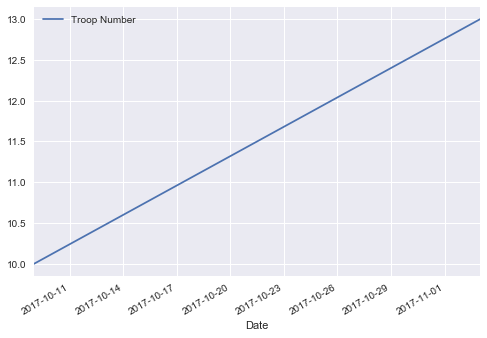

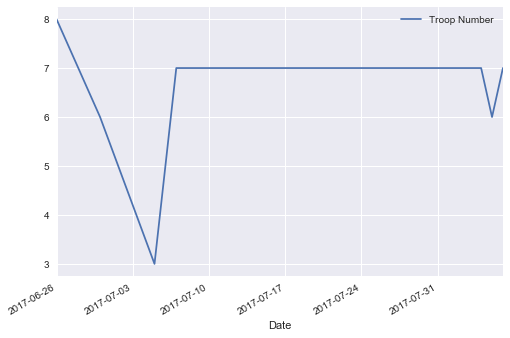

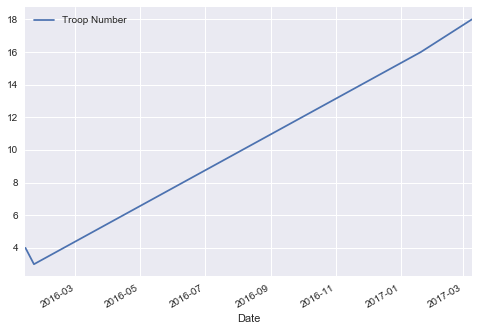

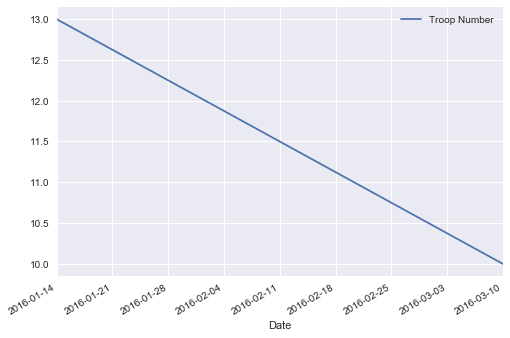

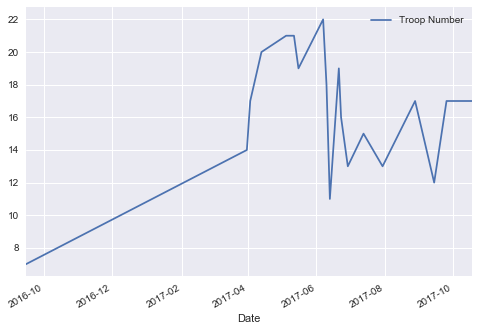

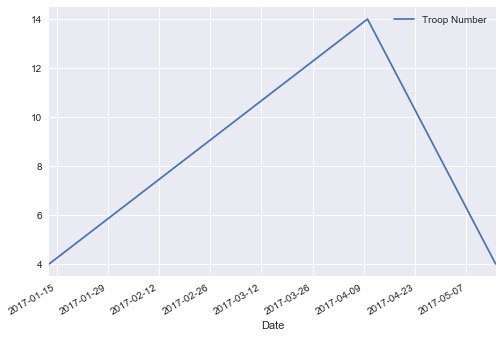

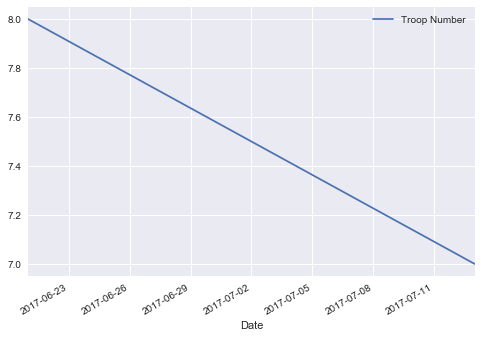

In [13]:
#Figure of Troop Sizes by Troop

death.groupby('Troop').plot(x = "Date",y = "Troop Number")

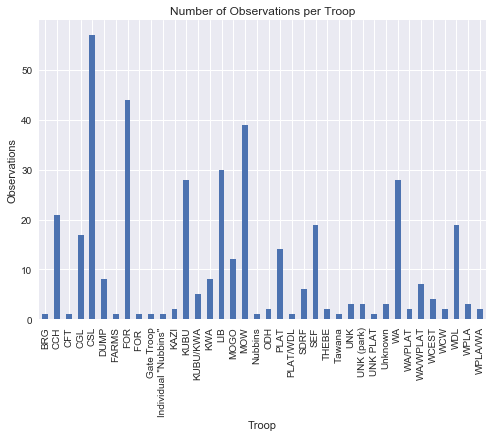

In [14]:
##Seasonality to pregnancy/birth?

##USe data with count complete = yes and NA

##Frequency of Troops##

wd = death.groupby("Troop").count().reset_index()

df = pd.DataFrame(wd, columns = ["Troop","Troop Number"])

df.plot(x = "Troop", y = "Troop Number", kind = 'bar').legend().set_visible(False)
plt.ylabel('Observations')
plt.title('Number of Observations per Troop')



In [15]:
#Identifying the troops with 'significant' number of observations

clean = df[df["Troop Number"] > 10]

clean_list = list(clean["Troop"])

clean_list

['CCH',
 'CGL',
 'CSL',
 'FOR',
 'KUBU',
 'LIB',
 'MOGO',
 'MOW',
 'PLAT',
 'SEF',
 'WA',
 'WDL']

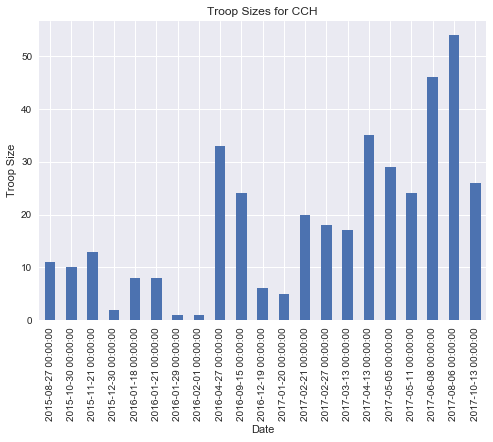

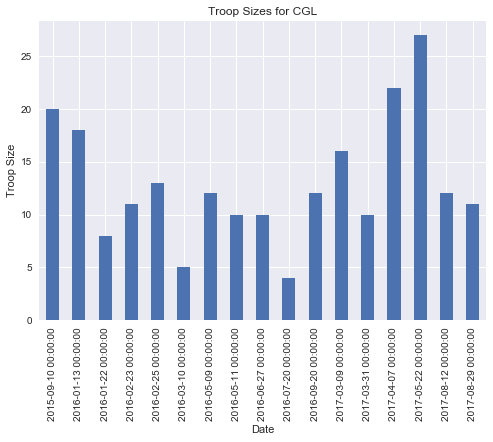

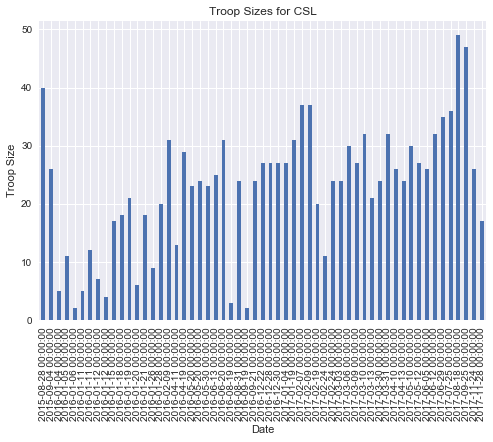

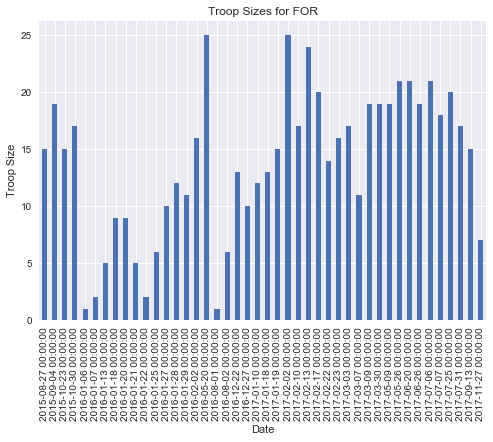

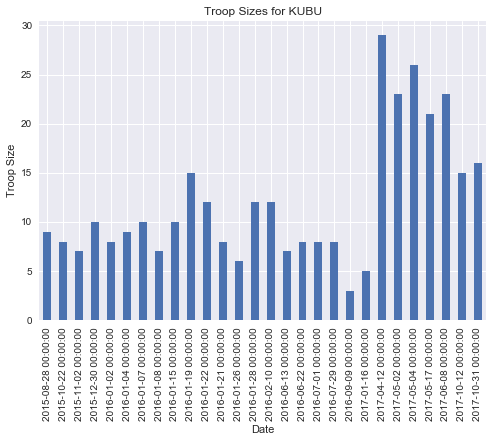

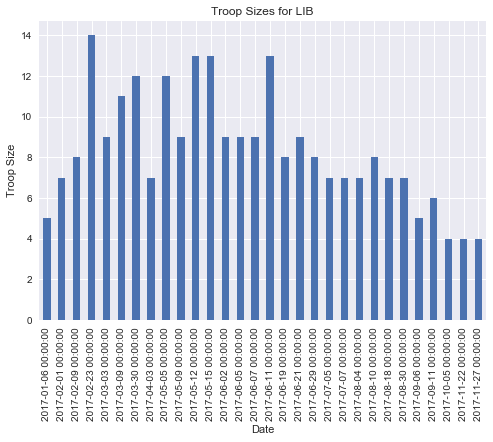

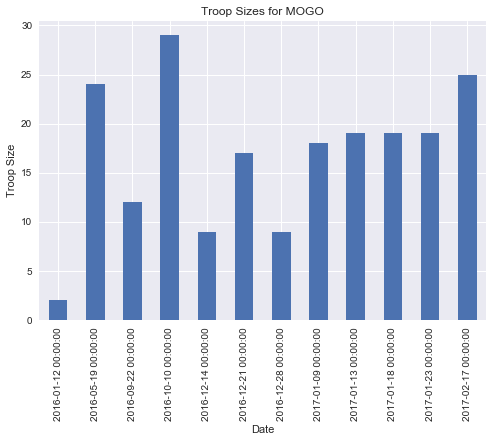

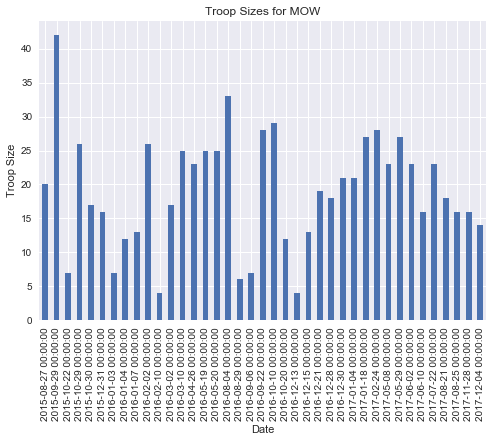

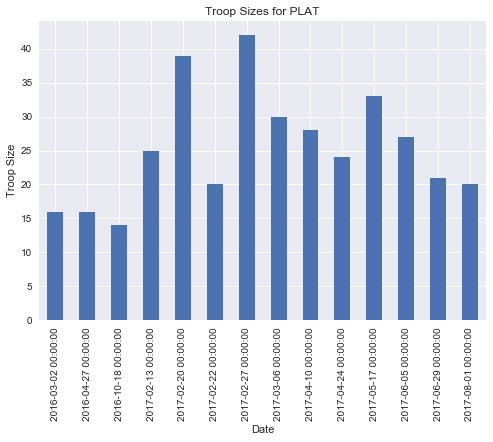

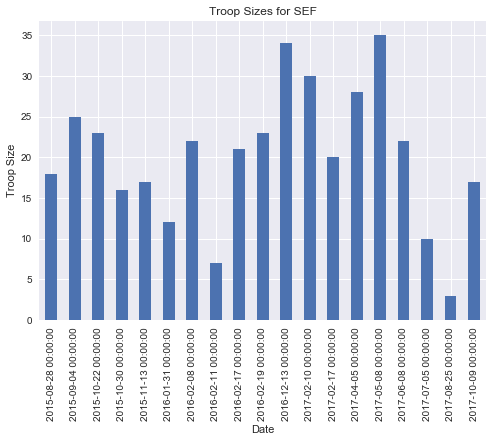

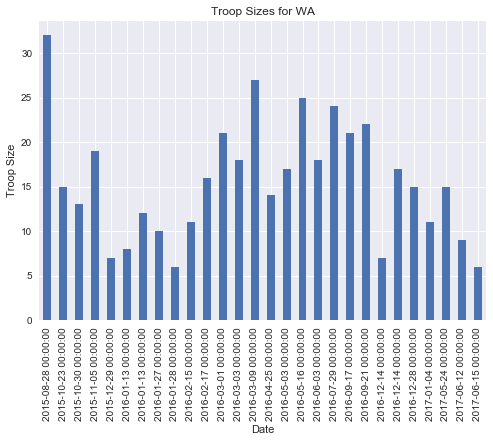

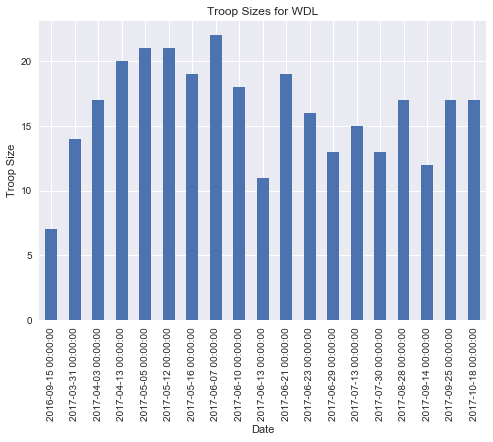

In [16]:
#Figure of Troop Sizes Over Time for Significant Troops
plt.figure(figsize = (14,12))
for i in clean_list:
    troop_death = death[death["Troop"] == i]
    troop_death.plot(x = "Date",y = "Troop Number", kind = 'bar').legend().set_visible(False)
    plt.ylabel('Troop Size')
    plt.title('Troop Sizes for '+i)
    #plt.savefig('%s Troop Sizes.png'%i, bbox_inches='tight', format = "PNG")
    

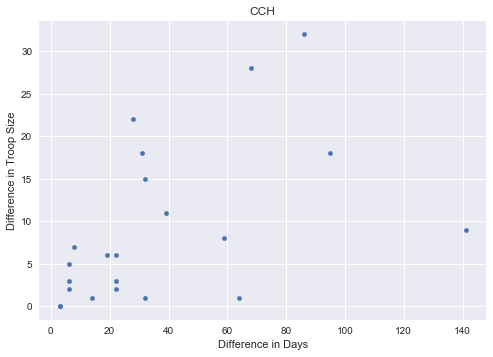

In [17]:
#Figure of Difference in Days Between Observations and Difference in Troop Sizes for Those Days

from dateutil import relativedelta
import matplotlib.dates as mdates
#Considering the odd differences in number, analyze the difference in numbers over time more in depth
#Scatter plot the difference in time by the difference in troop size
#Using this, we can indicate which dates per troop need to be "censored"

#Run a for loop for all the dates per troop to mark the difference relativedelta(i,i+1)
plt.figure(figsize = (14,12))
count = 0
for i in clean_list:
    if (count != 0):
        break
    df = death[death["Troop"] == i]
    
    date_diff = pd.DataFrame(df["Date"][1:].reset_index() - df["Date"][0:].reset_index())

    count_diff = pd.DataFrame(abs(df["Troop Number"][1:].reset_index() - df["Troop Number"][0:].reset_index()))

    diff = date_diff.merge(count_diff,on="index")
   
    diff["Date"] = diff["Date"].dt.days

    diff = diff.dropna(how = 'any')
    
    
    diff.plot(x = "Date",y = "Troop Number", kind = 'scatter')
    plt.xlabel('Difference in Days')
    plt.ylabel('Difference in Troop Size')
    plt.title(i)
    plt.savefig('%s Scatter.png'%i, bbox_inches='tight', format = "PNG")
    count +=1

        

In [18]:
diff

,index,Date,Troop Number
0,34.0,64.0,1.0
1,8.0,22.0,3.0
2,8.0,22.0,2.0
3,8.0,6.0,3.0
4,8.0,6.0,2.0
5,6.0,39.0,11.0
6,54.0,19.0,6.0
7,10.0,3.0,0.0
8,26.0,8.0,7.0
9,3.0,3.0,0.0


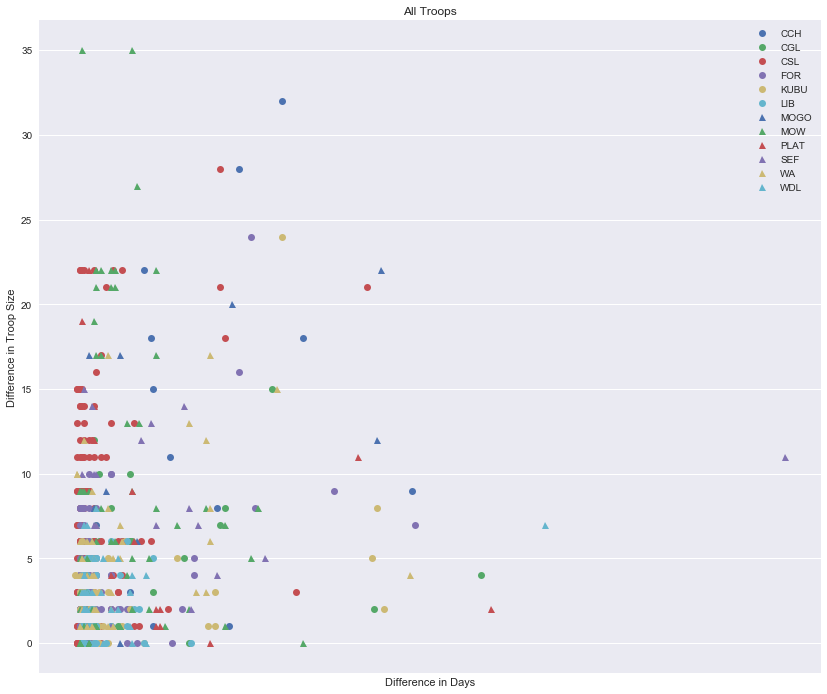

In [19]:
##Figure of Difference in Days Between Observations and Difference in Troop Sizes for Those Days (ALL TROOPS)

counter = 0
plt.figure(figsize = (14,12))

for i in clean_list:
    df = death[death["Troop"] == i]
    
    date_diff = pd.DataFrame(df["Date"][1:].reset_index() - df["Date"][0:].reset_index())

    count_diff = pd.DataFrame(abs(df["Troop Number"][1:].reset_index() - df["Troop Number"][0:].reset_index()))

    diff = date_diff.merge(count_diff,on="index")

    diff = diff.dropna(how = 'any')
    diff[str(i)] = diff["Troop Number"]
    
    
    if (counter < 6):
        plt.plot_date(x = diff["Date"],y = diff[str(i)])
         
    else:
        plt.plot_date(diff["Date"],diff[str(i)], "^")
 
    plt.xticks([])
    plt.xlabel('Difference in Days')
    plt.ylabel('Difference in Troop Size')
    plt.title('All Troops')
    plt.legend()
    counter+=1
#plt.savefig('All Troops Scatter.png', bbox_inches='tight', format = "PNG")    

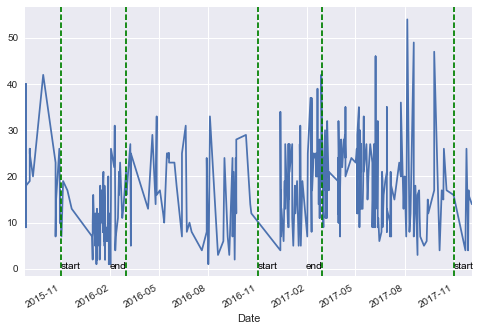

In [20]:
##Replot the figures from box 17 all in one figure
##Add shaded zones to figure for birth seasons

##Eventually do a regression along y(t+1) = y(t)+B1y(t) - B2y(t)
    #Estimate next months population based on current month's population
    #Whne estimating birth coefficients, must be in birth time zone
    #Estimate death alone, then fold it in and estimate during birth session
from pylab import * 
import matplotlib.patches as patches
    
    
plt.figure(figsize = (14,12))

frames = [0]*len(clean_list)

for i in range(len(clean_list)):
        frames[i] = death[death["Troop"] == clean_list[i]]

full_death = pd.concat(frames)
full_death.plot(x = "Date",y = "Troop Number").legend().set_visible(False)
#plt.fill_between("Date",'2015-11-1','2016-3-1', facecolor='green', alpha=0.5)
style = dict(size=10, color='black')
plt.text('2015-11-1',0 , "start",ha = 'left', **style)
plt.text('2016-3-1',0 , "end",ha = 'right', **style)
plt.axvline('2015-11-1',color = 'g', linestyle = 'dashed')
plt.axvline('2016-3-1',color = 'g', linestyle = 'dashed')

plt.text('2016-11-1',0 , "start",ha = 'left', **style)
plt.text('2017-3-1',0 , "end",ha = 'right', **style)
plt.axvline('2016-11-1',color = 'g', linestyle = 'dashed')
plt.axvline('2017-3-1',color = 'g', linestyle = 'dashed')

plt.text('2017-11-1',0 , "start",ha = 'left', **style)
plt.axvline('2017-11-1',color = 'g', linestyle = 'dashed')

#plt.savefig('All Troops Count.png', bbox_inches='tight', format = "PNG") 

In [21]:
date_diff = [0]*len(clean_list)
count_diff = [0]*len(clean_list)
total_diff = [0]*len(clean_list)
diff_frames = [0]*len(clean_list)

for i in range(len(clean_list)):
    diff_frames[i] = death[death["Troop"] == clean_list[i]]
    
    date_diff[i] = pd.DataFrame(diff_frames[i]["Date"][1:].reset_index() - diff_frames[i]["Date"][0:].reset_index())

    count_diff[i] = pd.DataFrame(abs(diff_frames[i]["Troop Number"][1:].reset_index() - diff_frames[i]["Troop Number"][0:].reset_index()))

    total_diff[i] = pd.concat([date_diff[i],count_diff[i]],axis =1)
    total_diff[i] = total_diff[i].drop(['index'],axis=1)

    total_diff[i] = total_diff[i].dropna(how = 'any')
    total_diff[i] = total_diff[i].rename(columns={'Troop Number': 'count_diff','Date':'date_diff'})

    total_diff[i] = pd.concat([diff_frames[i].reset_index(),total_diff[i]], axis =1,ignore_index = False)
    

In [22]:
total_diff[1]

,index,Date,Troop,Troop Number,Complete Count?,date_diff,count_diff
0,15,2015-09-10,CGL,20.0,NaN,125 days,2.0
1,89,2016-01-13,CGL,18.0,NaN,9 days,10.0
2,118,2016-01-22,CGL,8.0,NaN,32 days,3.0
3,215,2016-02-23,CGL,11.0,NaN,2 days,2.0
4,221,2016-02-25,CGL,13.0,Yes,14 days,8.0
5,257,2016-03-10,CGL,5.0,NaN,60 days,7.0
6,384,2016-05-09,CGL,12.0,NaN,2 days,2.0
7,386,2016-05-11,CGL,10.0,NaN,47 days,0.0
8,446,2016-06-27,CGL,10.0,NaN,23 days,6.0
9,498,2016-07-20,CGL,4.0,Yes,62 days,8.0


In [23]:
troop_week = [0]*len(clean_list)

for i in range(len(clean_list)):
    troop_week[i] = death[death["Troop"] == clean_list[i]]
    
    troop_week[i]["Date"] = troop_week[i]["Date"].dt.strftime('%W-%Y')
       
troop_week[9]

C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Troop,Troop Number,Complete Count?
6,34-2015,SEF,18.0,NaN
11,35-2015,SEF,25.0,NaN
27,42-2015,SEF,23.0,NaN
34,43-2015,SEF,16.0,NaN
40,45-2015,SEF,17.0,NaN
142,04-2016,SEF,12.0,NaN
157,06-2016,SEF,22.0,NaN
176,06-2016,SEF,7.0,NaN
189,07-2016,SEF,21.0,NaN
204,07-2016,SEF,23.0,Yes


In [24]:
#Plot week by troop number per troop
#When missing a week for a troop, use Series.interpolate()
#Need to:
    #Sort by year
    #Check for missing weeks
    #Create a series for the dates (somehow)
    #Use .interpolate() on the each series
#Should I separate by year? So that the series will only have integers?

#Need to upsample to create a series with all the weeks

#How to sum the counts that occur within a single week

In [25]:
test_series = total_diff[9].set_index('Date')['Troop Number']

test_series = pd.Series(test_series)

test_series

Date
2015-08-28    18.0
2015-09-04    25.0
2015-10-22    23.0
2015-10-30    16.0
2015-11-13    17.0
2016-01-31    12.0
2016-02-08    22.0
2016-02-11     7.0
2016-02-17    21.0
2016-02-19    23.0
2016-12-13    34.0
2017-02-10    30.0
2017-02-17    20.0
2017-04-05    28.0
2017-05-08    35.0
2017-06-08    22.0
2017-07-05    10.0
2017-08-25     3.0
2017-10-09    17.0
Name: Troop Number, dtype: float64

In [26]:
upsampled = test_series.resample('W')
upsampled.head(112)

C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


Date
2015-08-30    18.0
2015-09-06    25.0
2015-09-13     NaN
2015-09-20     NaN
2015-09-27     NaN
2015-10-04     NaN
2015-10-11     NaN
2015-10-18     NaN
2015-10-25    23.0
2015-11-01    16.0
2015-11-08     NaN
2015-11-15    17.0
2015-11-22     NaN
2015-11-29     NaN
2015-12-06     NaN
2015-12-13     NaN
2015-12-20     NaN
2015-12-27     NaN
2016-01-03     NaN
2016-01-10     NaN
2016-01-17     NaN
2016-01-24     NaN
2016-01-31    12.0
2016-02-07     NaN
2016-02-14    14.5
2016-02-21    22.0
2016-02-28     NaN
2016-03-06     NaN
2016-03-13     NaN
2016-03-20     NaN
              ... 
2017-03-26     NaN
2017-04-02     NaN
2017-04-09    28.0
2017-04-16     NaN
2017-04-23     NaN
2017-04-30     NaN
2017-05-07     NaN
2017-05-14    35.0
2017-05-21     NaN
2017-05-28     NaN
2017-06-04     NaN
2017-06-11    22.0
2017-06-18     NaN
2017-06-25     NaN
2017-07-02     NaN
2017-07-09    10.0
2017-07-16     NaN
2017-07-23     NaN
2017-07-30     NaN
2017-08-06     NaN
2017-08-13     NaN
2017-08

C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
.resample() is now a deferred operation
You called __getitem__(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  if __name__ == '__main__':


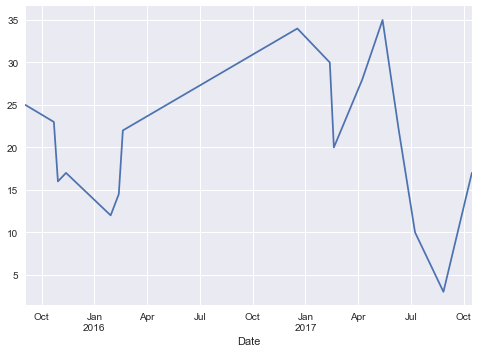

In [27]:
interpolated = upsampled[1:112].interpolate(method ='linear',limit = 60)
interpolated.plot()

C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: 
.resample() is now a deferred operation
You called __getitem__(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead


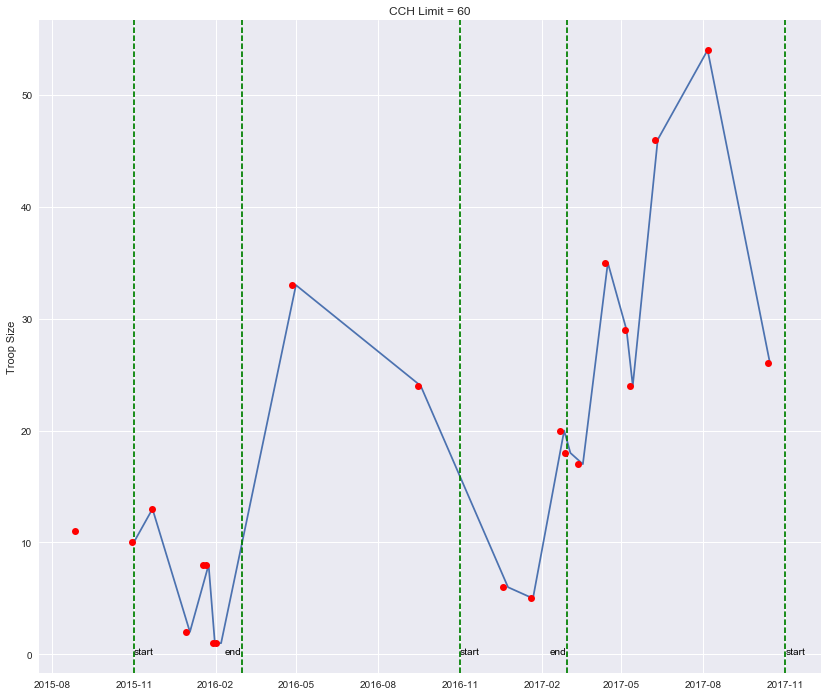

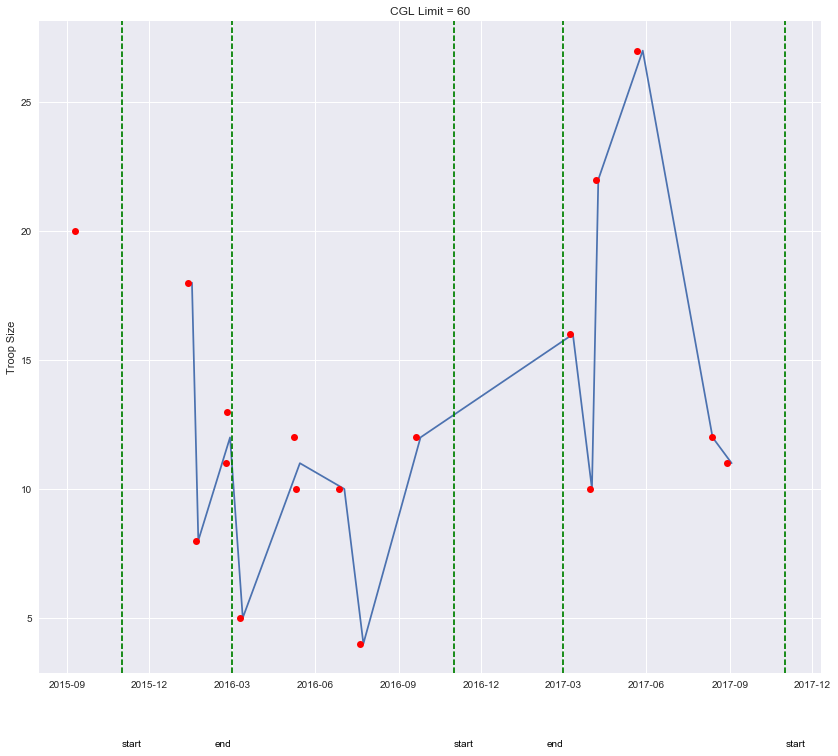

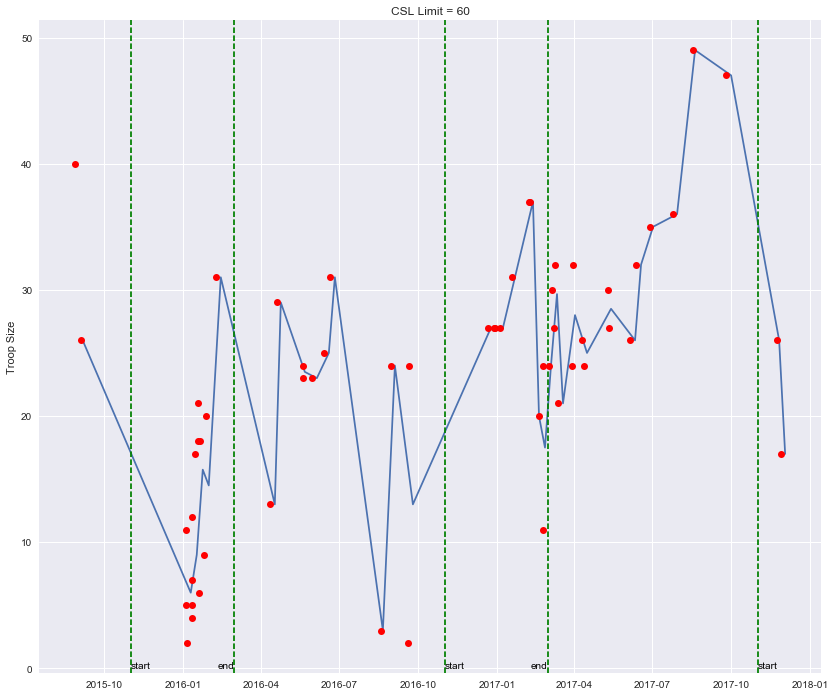

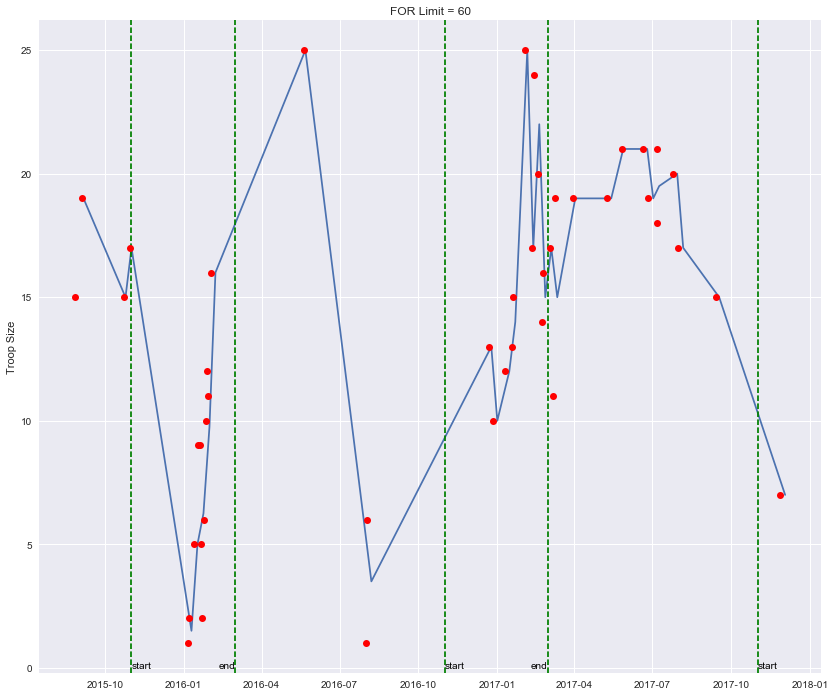

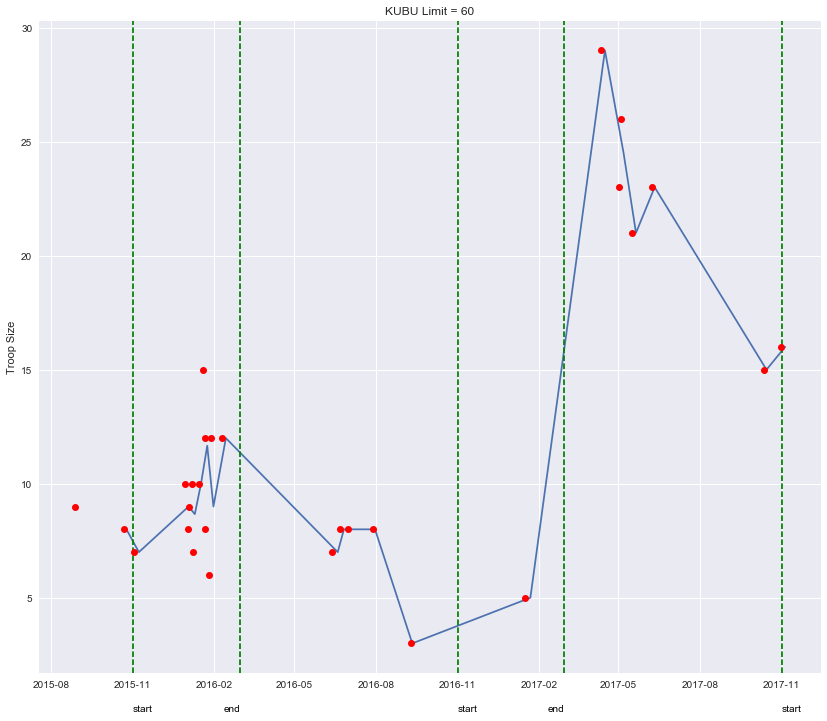

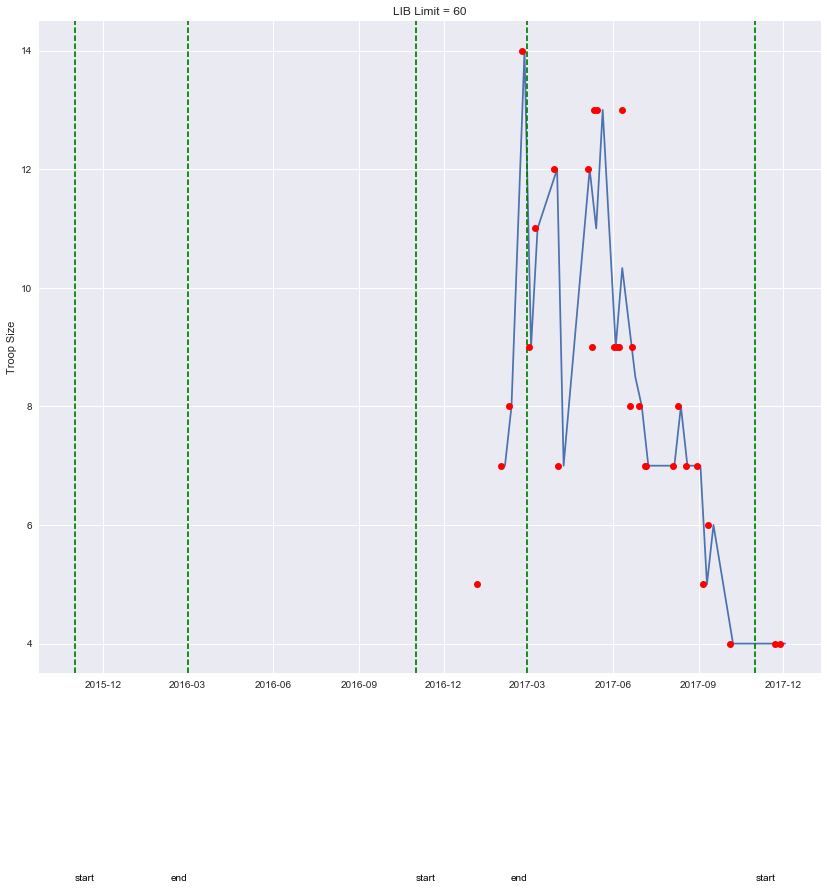

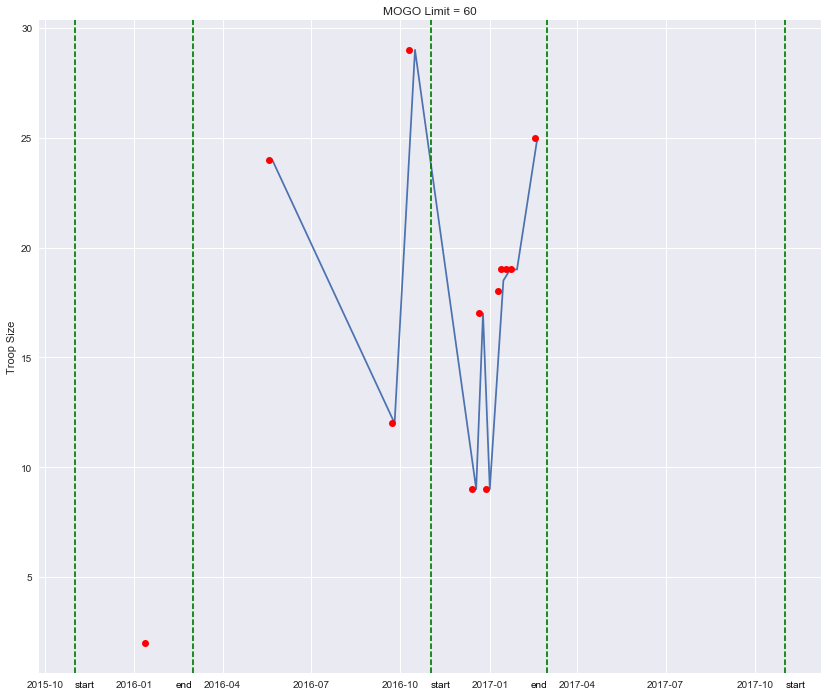

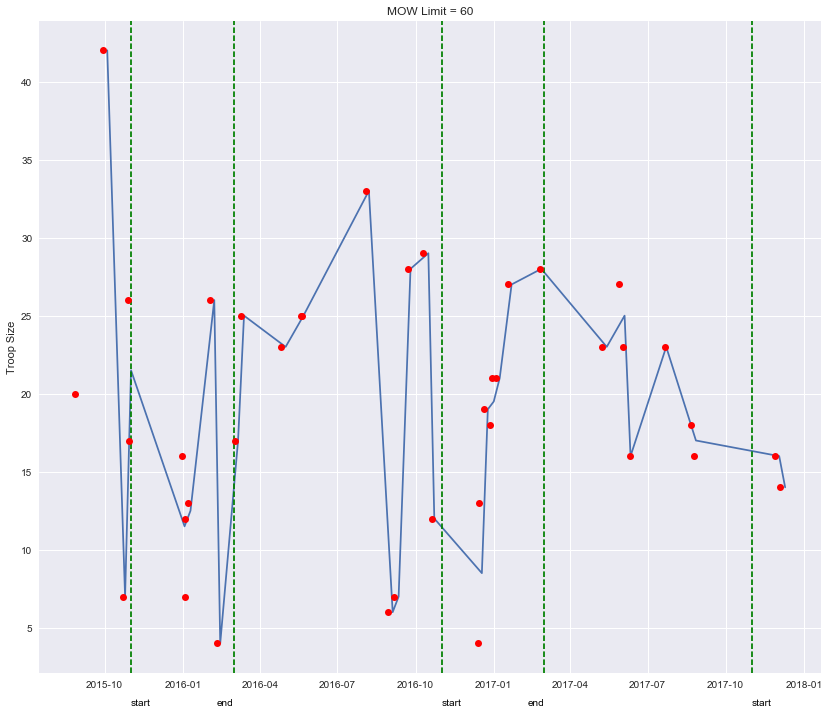

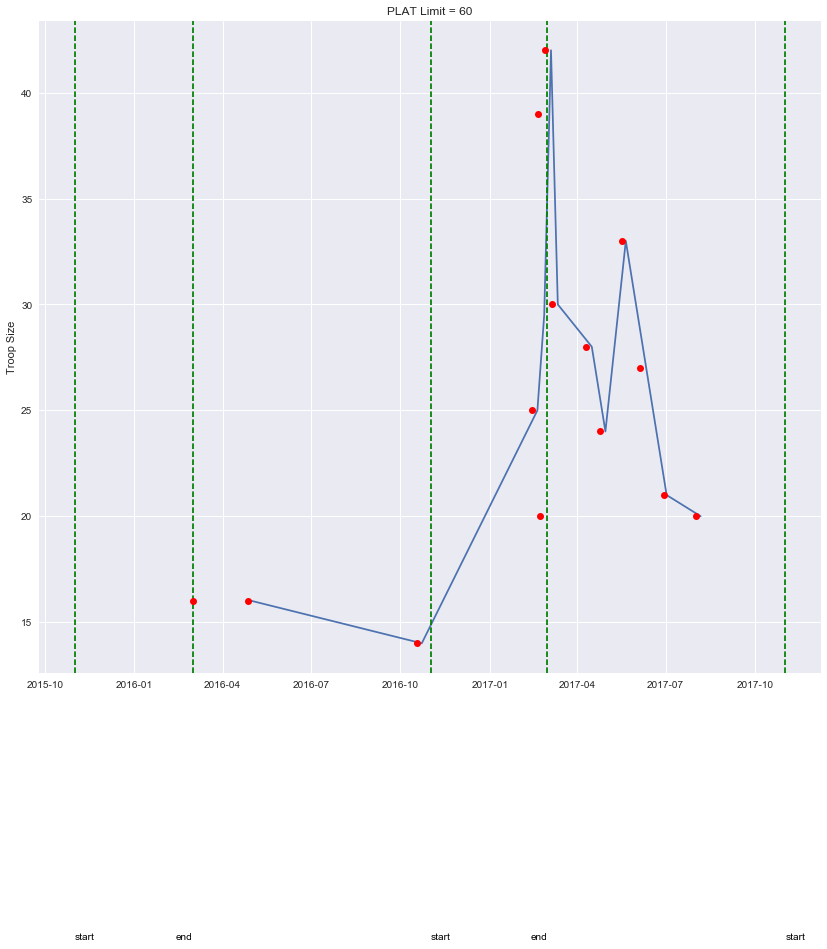

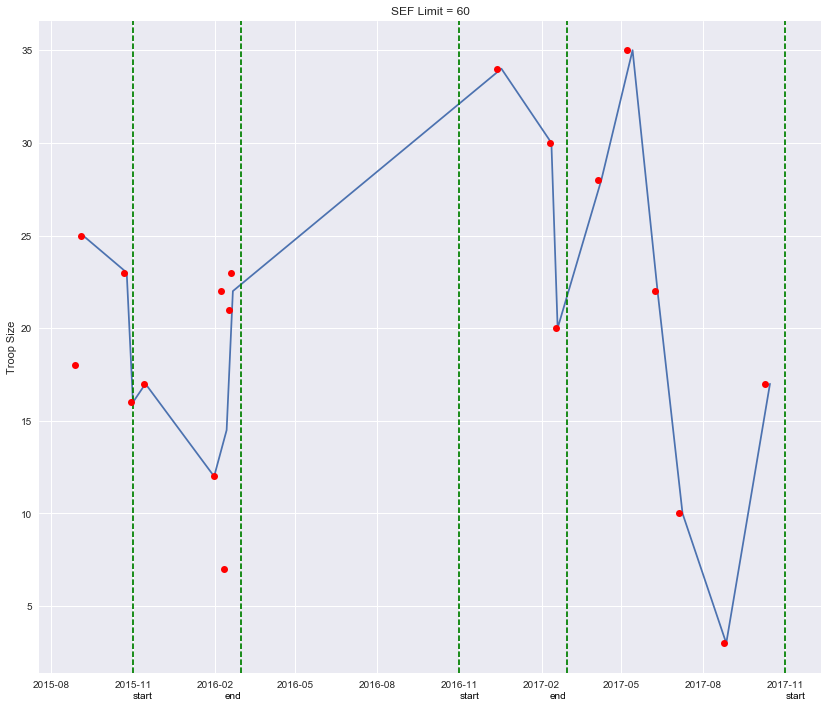

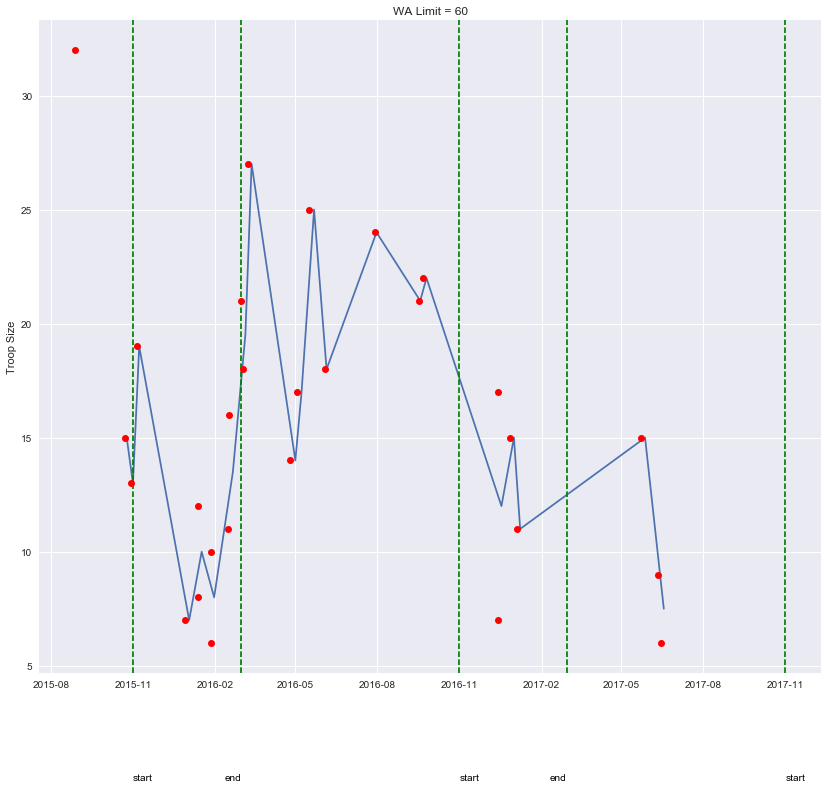

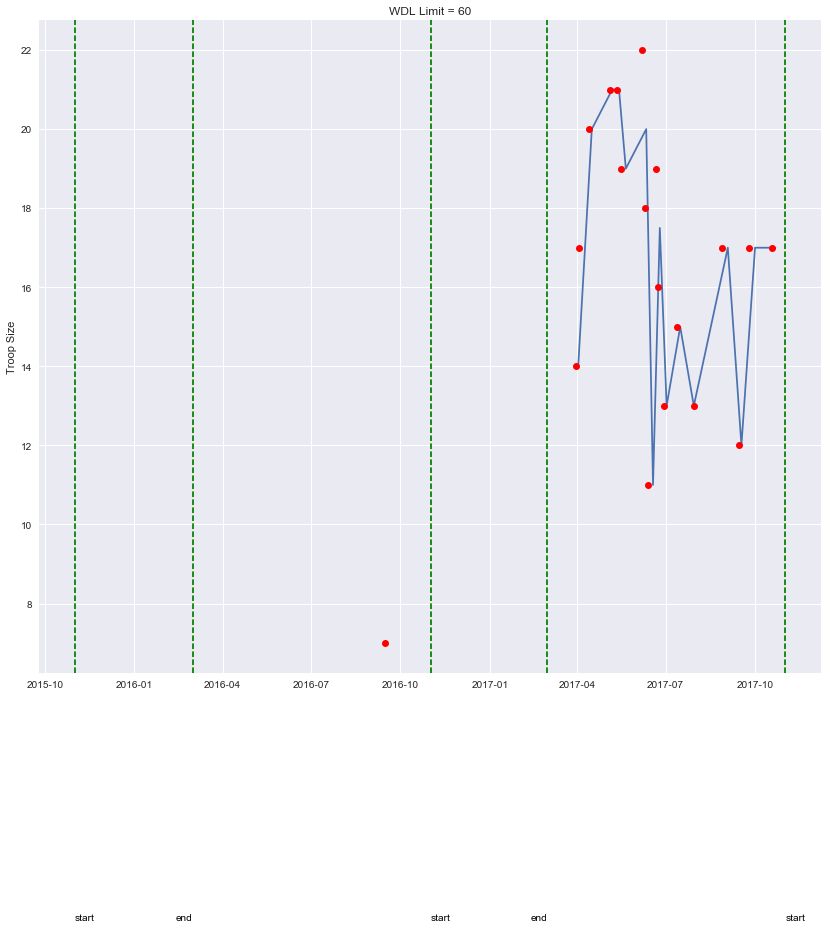

In [28]:
#Interpolate for all troops
inter_df = [0]*len(clean_list)

for i in range(len(clean_list)): 
    plt.figure(figsize = (14,12))
    test_series = total_diff[i].set_index('Date')['Troop Number']
    test_series = pd.Series(test_series)
    upsampled = test_series.resample('W')
    interpolated = upsampled[1:len(upsampled)].interpolate(method ='linear', limit = 60)
    inter_df[i] = pd.DataFrame(interpolated).reset_index() #Save as dataframe for death rate calc later
    plt.plot(interpolated)
    plt.title(clean_list[i]+' Limit = 60')
    plt.ylabel('Troop Size')
    
    style = dict(size=10, color='black')
    plt.text('2015-11-1',0 , "start",ha = 'left', **style)
    plt.text('2016-3-1',0 , "end",ha = 'right', **style)
    plt.axvline('2015-11-1',color = 'g', linestyle = 'dashed')
    plt.axvline('2016-3-1',color = 'g', linestyle = 'dashed')

    plt.text('2016-11-1',0 , "start",ha = 'left', **style)
    plt.text('2017-3-1',0 , "end",ha = 'right', **style)
    plt.axvline('2016-11-1',color = 'g', linestyle = 'dashed')
    plt.axvline('2017-3-1',color = 'g', linestyle = 'dashed')

    plt.text('2017-11-1',0 , "start",ha = 'left', **style)
    plt.axvline('2017-11-1',color = 'g', linestyle = 'dashed')
    
    
    troop_death = death[death["Troop"] == clean_list[i]]
    plt.plot_date(x = troop_death["Date"],y = troop_death["Troop Number"], color = 'r')
    
    
    #plt.savefig(clean_list[i] + ' IMSD.png', bbox_inches='tight', format = "PNG") 


In [202]:
##Calculate death rate as max - min / diff in time
###########################################################
##General birth ranges

start15 = datetime.datetime(2015,11,1)
end15 = datetime.datetime(2016,3,1)

start16 = datetime.datetime(2016,11,1)
end16 = datetime.datetime(2017,3,1)

start17 = datetime.datetime(2017,11,1)
##end17 = datetime.datetime(2018,3,1) ##Not needed yet (timewise)

#####################################################
##Data tracking lists

troop_rates = [0]*len(clean_list)

#####################################################
for i in range(len(clean_list)): #For each troop
    
    ####################################
    ##range lists
    range1 = pd.DataFrame(inter_df[i][inter_df[i]["Date"] < start15]) #Before first birth range

    range2 = pd.DataFrame(inter_df[i][inter_df[i]["Date"] > end15]) #Between first and second birth range
    range2 = range2[range2["Date"] < start16]

    range3 = pd.DataFrame(inter_df[i][inter_df[i]["Date"] > end16])
    range3 = range3[range3["Date"] < start17]

    range_list = [range1,range2,range3]
    
    troop_rates[i] = []
    ####################################
    #calculating rates
    for j in range_list:
        ranges = j.dropna(how = 'any')
        
        if((ranges.empty == True) | (ranges.dropna().empty == True)):
            continue

        else:
            max_ind = ranges["Troop Number"].idxmax()
            min_ind = ranges["Troop Number"].idxmin()

            diff_num = (ranges["Troop Number"].max() - ranges["Troop Number"].min())
            diff_dates = ranges["Date"][max_ind] - ranges["Date"][min_ind]

            troop_rate = diff_num/(diff_dates.days/7)
            
            if (np.isnan(troop_rate) == True):
                continue
            else:
                troop_rates[i].append(troop_rate)

        
        

C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:50: RuntimeWarning: invalid value encountered in double_scalars


In [203]:
troop_rates

[[2.666666666666667, 1.8500000000000001],
 [0.63095238095238104, 2.125],
 [-1.1111111111111112, -3.5, 1.2727272727272727],
 [-0.5714285714285714, -1.9545454545454546, -0.47107438016528924],
 [-0.30246913580246909, -0.53846153846153844],
 [-0.45000000000000001],
 [5.666666666666667],
 [-11.666666666666666, -6.75, -0.82467532467532478],
 [-0.080000000000000002, -1.0],
 [-0.2857142857142857, 0.27906976744186052, -2.1333333333333333],
 [-1.8571428571428572, -2.5],
 [-1.6666666666666667]]

In [204]:
averages = [0]*len(clean_list)

for i in range(len(clean_list)):
    averages[i] = sum(troop_rates[i])/len(troop_rates[i])
total_avg = sum(averages)/len(averages)

print("All Averages: ",averages)
print("Overall average: ",total_avg)

All Averages:  [2.2583333333333337, 1.3779761904761905, -1.1127946127946127, -0.99901613537977185, -0.42046533713200374, -0.45000000000000001, 5.666666666666667, -6.4137806637806634, -0.54000000000000004, -0.71332595053525283, -2.1785714285714288, -1.6666666666666667]
Overall average:  -0.432637050365


In [320]:
avgs = pd.DataFrame(averages,index = clean_list)
avgs = avgs.rename(columns = {0:"mortality w/ set zones"})
avgs

,mortality w/ set zones
CCH,2.258333
CGL,1.377976
CSL,-1.112795
FOR,-0.999016
KUBU,-0.420465
LIB,-0.450000
MOGO,5.666667
MOW,-6.413781
PLAT,-0.540000
SEF,-0.713326


# Mortality Rate (by peak)

In [442]:
def mort_rate(rang): 
    max_ind = rang["Troop Number"].idxmax()
    min_ind = rang["Troop Number"].idxmin()

    diff_num = rang["Troop Number"].max() - rang["Troop Number"].min()
    diff_dates = rang["Date"][max_ind] - rang["Date"][min_ind]

    rate = diff_num/(diff_dates.days/7)
    plot_date = abs(diff_dates.days/7)
    return rate, plot_date 

In [386]:
##To counteract positive mortality rates, 
##redefine the death zones based on visualization

new_avgs = []
plot_dates = []
plot_avgs = []
################################
##CCH rate calc

CCH = inter_df[0]

cch_range1 = CCH[CCH["Date"] > datetime.datetime(2016,4,1)]
cch_range1 = cch_range1[cch_range1["Date"] < end16]

cch_rate1, cch_date1 = mort_rate(cch_range1)
plot_avgs.append(cch_rate1)


cch_range2 = CCH[CCH["Date"] > datetime.datetime(2017,7,1)]
cch_range2 = cch_range2[cch_range2["Date"] < start17]


cch_rate2, cch_date2 = mort_rate(cch_range2)
plot_avgs.append(cch_rate2)

cch_rate = (cch_rate1 + cch_rate2)/2

plot_dates.append(cch_date1)
plot_dates.append(cch_date2)

new_avgs.append(cch_rate)
#####################################
##CGL rate calc
CGL = inter_df[1]

cgl_range1 = CGL[CGL["Date"] > start15]
cgl_range1 = cgl_range1[cgl_range1["Date"] < start16]

cgl_rate1, cgl_date1 = mort_rate(cgl_range1)


cgl_range2 = CGL[CGL["Date"] > datetime.datetime(2017,5,1)]
cgl_range2 = cgl_range2[cgl_range2["Date"] < start17]

cgl_rate2, cgl_date2 = mort_rate(cgl_range2)

cgl_rate = (cgl_rate1 + cgl_rate2)/2

plot_dates.append(cgl_date1)
plot_dates.append(cgl_date2)

new_avgs.append(cgl_rate)
###########################
##CSL rate calc
CSL = inter_df[2]

csl_range1 = CSL[CSL["Date"] > end15]
csl_range1 = csl_range1[csl_range1["Date"] < start16]

csl_rate1 = mort_rate(csl_range1)

csl_range2 = CSL[CSL["Date"] > start16]
csl_range2 = csl_range2[csl_range2["Date"] < end16]

csl_rate2 = mort_rate(csl_range2)

csl_range3 = CSL[CSL["Date"] > end16]

csl_rate3 = mort_rate(csl_range3)

csl_rate = (csl_rate1+csl_rate2+csl_rate3)/3

new_avgs.append(csl_rate)
########################################
##FOR rate calc
FOR = inter_df[3]

for_range1 = FOR[FOR["Date"] < end15]

for_rate1 = mort_rate(for_range1)

for_range2 = FOR[FOR["Date"] > end15]
for_range2 = for_range2[for_range2["Date"] < start16]

for_rate2 = mort_rate(for_range2)

for_range3 = FOR[FOR["Date"] > start16]

for_rate3 = mort_rate(for_range3)

for_rate = (for_rate1 + for_rate2 + for_rate3)/3

new_avgs.append(for_rate)
######################################################
##KUBU rate calc

KUBU = inter_df[4]

kub_range1 = KUBU[KUBU["Date"] > start15]
kub_range1 = kub_range1[kub_range1["Date"] < start16]

kub_rate1 = mort_rate(kub_range1)

kub_range2 = KUBU[KUBU["Date"] > end16]

kub_rate2 = mort_rate(kub_range2)

kubu_rate = (kub_rate1 + kub_rate2)/2

new_avgs.append(kubu_rate)
##################################################
##LIB rate calc

LIB = inter_df[5]

lib_range1 = LIB[LIB["Date"] < datetime.datetime(2017,5,1)]
lib_range1 = lib_range1[lib_range1["Date"] > datetime.datetime(2017,2,13)]

lib_rate1 = mort_rate(lib_range1)

lib_range2 = LIB[LIB["Date"] > datetime.datetime(2017,5,1)]

lib_rate2 = mort_rate(lib_range2)

lib_rate = (lib_rate1+lib_rate2)/2

new_avgs.append(lib_rate)
#################################################
##MOGO rate calc

MOGO = inter_df[6]

mogo_rate = mort_rate(MOGO)

new_avgs.append(mogo_rate)
###############################################
##MOW rate calc
##There are too many drops. May need to calculate mortality differently

MOW = inter_df[7]


new_avgs.append(NaN)
##############################################
##PLAT rate calc
##requires editing b/c two peaks

PLAT = inter_df[8]

plat_range = PLAT[PLAT["Date"] > end16]

#Had to manually find and add the two peaks
plat_range["Troop Number"][51] += plat_range["Troop Number"][62]

#If line below is commented out, considering last point at min
#plat_range = plat_range[plat_range["Date"] < datetime.datetime(2017,5,21)]

plat_rate = mort_rate(plat_range)


new_avgs.append(plat_rate)
################################################
##SEF rate calc
##do normal
SEF = inter_df[9]

sef_range1 = SEF[SEF["Date"] < end15]

sef_rate1 = mort_rate(sef_range1)

sef_range2 = SEF[SEF["Date"] > start16]
sef_range2 = sef_range2[sef_range2["Date"] < end16]

sef_rate2 = mort_rate(sef_range2)

sef_range3 = SEF[SEF["Date"] > end16]

sef_rate3 = mort_rate(sef_range3)

sef_rate = (sef_rate1 + sef_rate2 + sef_rate3)/3

new_avgs.append(sef_rate)
######################################################
##WA rate calc
##Needs special work

WA = inter_df[10]


new_avgs.append(NaN)
############################################
##WDL rate calc
##Needs special work

WDL = inter_df[11]


new_avgs.append(NaN)

C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\GabsS\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [387]:
print('All Averages: ', new_avgs,'\n')

total_newavg = sum(new_avgs)/len(new_avgs)
print("Overall Average: ", total_newavg)

All Averages:  [-1.7684210526315789, -0.8306878306878307, -5.1277777777777773, -1.1151241093101558, -0.41923076923076918, -0.80833333333333335, -2.2222222222222223, nan, -2.5, -1.4359788359788361, nan, nan] 

Overall Average:  nan


In [388]:
##Don't run unless there are 12 elements in new_avgs
avgs_by_peak = pd.DataFrame(new_avgs, index = clean_list)
avgs_by_peak = avgs_by_peak.rename(columns = {0:"mortality by peak"})
avgs_by_peak

,mortality by peak
CCH,-1.768421
CGL,-0.830688
CSL,-5.127778
FOR,-1.115124
KUBU,-0.419231
LIB,-0.808333
MOGO,-2.222222
MOW,NaN
PLAT,-2.500000
SEF,-1.435979


# Mortality Rate (by decrease)

In [324]:
##Calculating death rate by decreasing troop number
#Save interpolated as a list of dataframes to mess with numbers

#if troop size decreases => single rate = smaller number/bigger number 
#=> troop death rate = sum(all single rates)/number of iterations or single rates
#=> total death rate = sum(all troop death rates)/len(clean_list)


troop_rates_perc = []
troop_rates = []

for i in range(len(clean_list)): #For every troop
    rates_holder = [] #Holds rates PER TROOP only
    for j in range(len(inter_df[i])-1): #For every df per troop (is len()-1 to not go beyond boundaries... j+1 would cause issue)
        if (np.isnan(inter_df[i]["Troop Number"][j]) == False): #if entry is not NaN
            if (inter_df[i]["Troop Number"][j] > inter_df[i]["Troop Number"][j+1]):
                death_rate = -(inter_df[i]["Troop Number"][j] - inter_df[i]["Troop Number"][j+1])
                ###I added a negative to this so it's easier to compare to the other rates
                rates_holder.append(death_rate)
    troop_rate = sum(rates_holder)/len(rates_holder)      
    troop_rates.append(troop_rate)

    

avg_death = sum(troop_rates)/len(troop_rates)

print("Troop Rate: ",troop_rates,"\n")
print("Average death rate:", avg_death,"\n")

Troop Rate:  [-1.4193548387096775, -1.5333333333333337, -2.1727053140096615, -1.4901960784313726, -0.58823529411764708, -1.6666666666666672, -1.4285714285714286, -2.1461538461538461, -0.75000000000000033, -1.3953488372093024, -1.4069767441860466, -3.2142857142857144] 

Average death rate: -1.60098567464 



In [429]:
avgs_by_dec = pd.DataFrame(troop_rates,index = clean_list)
avgs_by_dec = avgs_by_dec.rename(columns = {0:"mortality by dec"})
comp_avgs = pd.concat([avgs_by_dec,avgs,avgs_by_peak], axis =1)
comp_avgs

,mortality by dec,mortality w/ set zones,mortality by peak
CCH,-1.419355,2.258333,-1.768421
CGL,-1.533333,1.377976,-0.830688
CSL,-2.172705,-1.112795,-5.127778
FOR,-1.490196,-0.999016,-1.115124
KUBU,-0.588235,-0.420465,-0.419231
LIB,-1.666667,-0.450000,-0.808333
MOGO,-1.428571,5.666667,-2.222222
MOW,-2.146154,-6.413781,NaN
PLAT,-0.750000,-0.540000,-2.500000
SEF,-1.395349,-0.713326,-1.435979


In [ ]:
##mortality by peak is dy/dt
## to find r (birth and death rate [change in population size])
## (dy/dt)/y(t) will give the r parameter


##


##Talk to Marcella Kelly in Cheatham